In [326]:
import cv2
import imutils
import pytesseract
from matplotlib.pyplot import imshow, show, subplot, title, get_cmap
from skimage.color import rgb2gray, gray2rgb, rgb2hsv, rgb2lab, lab2rgb


In [327]:
# 12, 158, 251: Too dark and is not captured 
# 62: license plate is too bright, so it was not captured 
# 65, 86, 109, 118, 170, 193, 206, 225, 246, 264, 306, 322, 373, 386, 422: works but captures more than just the license plate
# 100: toooo blurry bas captured

# DO NOT USE FRANCO (* ￣︿￣)
#### dark images
- image 12 does not exist :)
- preprocessing did not work with image 158
- preprocessing worked with image 251 but after croping it 
  (segmentation did not work after cropping it -good exapmle for preprocessing-)
#### bright images
- image 62 preprocessing did not work with it
#### other images
- 65, 86, ...etc we may crop them (the easiest solution)
#### blurry image 
- sharping filter may be used with these images

In [328]:
# Total: 80
# Captured: 76
# Not Captured: 4

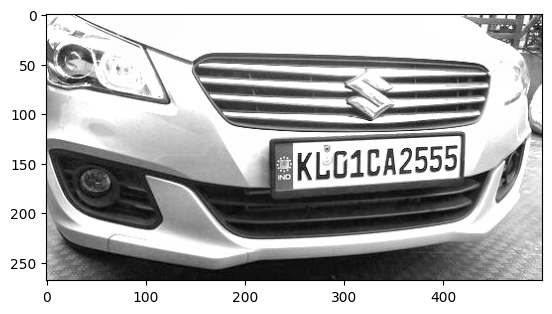

In [329]:
carImage = cv2.imread("../Codes/test2.png")
# carImage = cv2.imread("../test.jpg")
# carImage = cv2.imread("../dataset/Cars193.png")
#carImage = imutils.resize(carImage, width=600)
imshow(carImage)

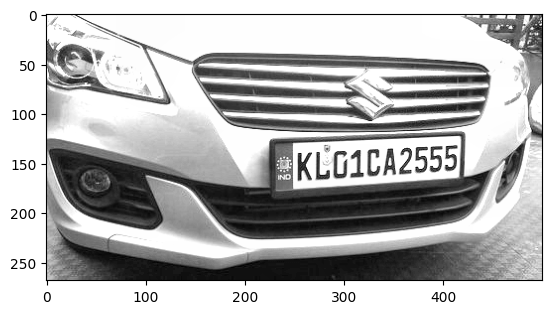

In [330]:
greyCar = cv2.cvtColor(carImage, cv2.COLOR_RGB2GRAY)
imshow(greyCar, "gray")

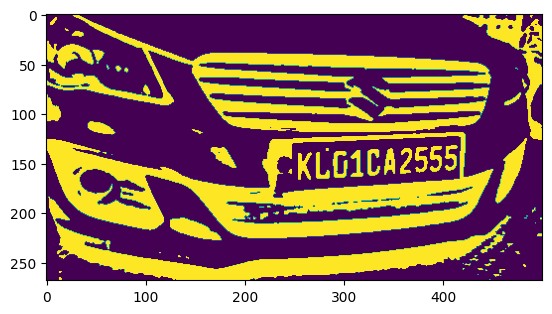

In [331]:
greyCar = cv2.GaussianBlur(greyCar, (5, 5), 0)
thresh = cv2.adaptiveThreshold(greyCar, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 45, 15)
imshow(thresh)

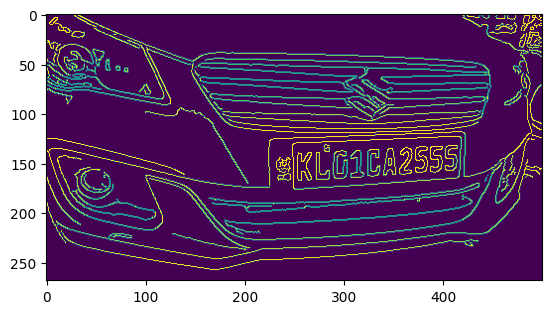

In [332]:
edged = cv2.Canny(greyCar, 30, 200)
imshow(edged)

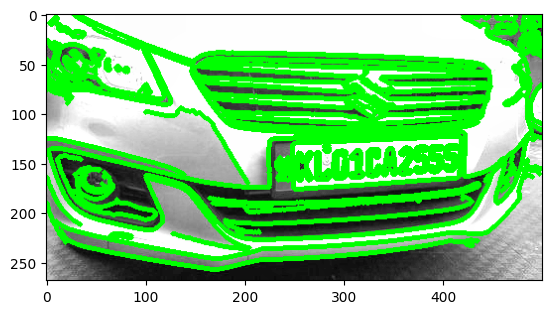

In [333]:
cnts,new = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
carCopy=carImage.copy()
cv2.drawContours(carCopy,cnts,-1,(0,255,0),3)
imshow(carCopy)

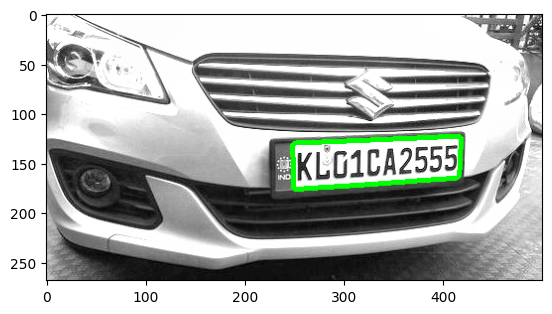

In [334]:
cnts = sorted(cnts, key = cv2.contourArea, reverse = True) [:1]
screenCnt = None
image2 = carImage.copy()
cv2.drawContours(image2,cnts,-1,(0,255,0),3)
imshow(image2)

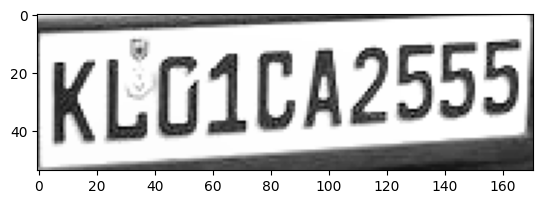

In [337]:
x,y,w,h = cv2.boundingRect(cnts[0]) 
new_img=greyCar[y:y+h,x:x+w]
cv2.imwrite("plate.png",new_img)
imshow(new_img)